In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [45]:
from tensorflow.examples.tutorials.mnist import input_data

In [46]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [47]:
x=tf.placeholder(tf.float32, [None,784])
y=tf.placeholder(tf.float32, [None,10])

In [48]:
w=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))

In [49]:
hf=tf.nn.softmax(tf.matmul(x,w)+b)

In [50]:
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [51]:
isCorrect=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))

In [52]:
accuracy=tf.reduce_mean(tf.cast(isCorrect,tf.float32))

In [53]:
numEpochs=15
batchSize=100
numIter=int(mnist.train.num_examples/batchSize)
# 60000 / 100 = 600

In [54]:
#tf.reset_default_graph()

에폭:0001, cost:2.775853102
에폭:0002, cost:1.124863169
에폭:0003, cost:0.892708509
에폭:0004, cost:0.779763279
에폭:0005, cost:0.708565397
에폭:0006, cost:0.658113061
에폭:0007, cost:0.620275978
에폭:0008, cost:0.589766805
에폭:0009, cost:0.565169123
에폭:0010, cost:0.544060498
에폭:0011, cost:0.526480060
에폭:0012, cost:0.510547252
에폭:0013, cost:0.497044321
에폭:0014, cost:0.484776964
에폭:0015, cost:0.474462277
정확도: 0.8901
레이블: [5]
예측: [5]


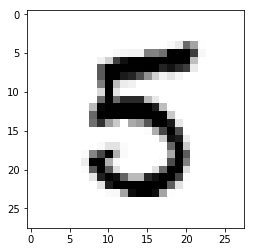

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #트레이닝
    for epoch in range(numEpochs):#15에폭
        avgCv=0
        for i in range(numIter): #600
            batchX,batchY=mnist.train.next_batch(batchSize)
            _,cv=sess.run([train,cost], feed_dict={x:batchX,y:batchY})
            avgCv+=cv/numIter
        print("에폭:{:04d}, cost:{:.9f}".format(epoch+1,avgCv))
    print("정확도:", accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    r=random.randint(0,mnist.test.num_examples-1)
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("예측:", sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap='Greys')
    plt.show()
    
    

In [ ]:
#학습 모델 저장/불러오기 (keras)

In [56]:
#다층퍼셉트론 모델
#훈련셋,검증셋,시험셋

In [58]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
import numpy as np

In [59]:
(xTrain, yTrain), (xTest,yTest)
=mnist.load_data()

In [61]:
#전처리
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [65]:
yTrain=np_utils.to_categorical(yTrain)
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [66]:
yTest=np_utils.to_categorical(yTest)
yTest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
xVal=xTrain[42000:]
xTrain=xTrain[:42000]
yVal=yTrain[42000:]
yTrain=yTrain[:42000]

In [69]:
yTrain.shape

(42000, 10)

In [70]:
#모델 구성
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [74]:
#학습 환경 설정(compile)
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#학습(fit)
model.fit(xTrain,yTrain,epochs=5, batch_size=50,validation_data=(xVal,yVal))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 31us/step - loss: 0.9248 - accuracy: 0.7722 - val_loss: 0.5003 - val_accuracy: 0.8711
Epoch 2/5
42000/42000 [==============================] - 1s 27us/step - loss: 0.4479 - accuracy: 0.8807 - val_loss: 0.3898 - val_accuracy: 0.8926
Epoch 3/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3758 - accuracy: 0.8965 - val_loss: 0.3487 - val_accuracy: 0.9003
Epoch 4/5
42000/42000 [==============================] - 1s 26us/step - loss: 0.3414 - accuracy: 0.9045 - val_loss: 0.3255 - val_accuracy: 0.9068
Epoch 5/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3190 - accuracy: 0.9095 - val_loss: 0.3093 - val_accuracy: 0.9111


In [75]:
#모델 평가하기(test data)
metrics=model.evaluate(xTest,yTest,batch_size=50)
print("평가결과:"+str(metrics))

10000/10000 [==============================] - 0s 13us/step
평가결과:[0.29565307053737344, 0.9168000221252441]


In [81]:
idx=np.random.choice(xTest.shape[0],5)
xHat=xTest[idx]
yHat=model.predict_classes(xHat)

In [99]:
#print("예측값:",yHat) #예측값

for i in range(5):
    print("예측값 : "+ str(yHat[i]) + " 실제값 : "+str(np.argmax(yTest[idx[i]])))

예측값 : 6 실제값 : 6
예측값 : 9 실제값 : 9
예측값 : 8 실제값 : 8
예측값 : 1 실제값 : 8
예측값 : 0 실제값 : 0


In [107]:
"""
모델 : 모델 아키텍처와 모델 가중치로 구성
모델 아키텍처:모델이 어떤 층으로 구성
모델 가중치:weight, bias

save():케라스 모델 저장 함수(아키텍처+가중치)
파일형식 : "h5"로 저장
"""
model.save("mnist_model.h5")

In [110]:
#모델 아키텍쳐 확인
# from keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# SVG(model_to_dot(model, show_shapes=True).
#     create(prog="dot", format="svg"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [113]:
#실제 데이터 사용
(xTrain, yTrain), (xTest,yTest)=mnist.load_data()
xTest=xTest.reshape(10000,784).astype('float32')/255.0
yTest=np_utils.to_categorical(yTest)
idx=np.random.choice(xTest.shape[0],10)
xhat=xTest[idx]
#모델 불러오기
from keras.models import load_model
model=load_model("mnist_model.h5")
yhat=model.predict_classes(xhat)
for i in range(10):
    print("예측값 : "+ str(yhat[i]) + 
          " 실제값 : "+str(np.argmax(
              yTest[idx[i]])))

예측값 : 9 실제값 : 9
예측값 : 4 실제값 : 4
예측값 : 2 실제값 : 2
예측값 : 5 실제값 : 5
예측값 : 8 실제값 : 8
예측값 : 3 실제값 : 3
예측값 : 1 실제값 : 1
예측값 : 5 실제값 : 5
예측값 : 4 실제값 : 4
예측값 : 9 실제값 : 8


In [116]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [117]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [118]:
x=tf.placeholder(tf.float32,shape=[None,4])
y=tf.placeholder(tf.float32,shape=[None,1])

In [119]:
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

In [120]:
hf=tf.matmul(x,w)+b

In [121]:
cost=tf.reduce_mean(tf.square(hf-y))

In [123]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [124]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [126]:
for step in range(101):
    cv,hv,_=sess.run([cost,hf,train],
                     feed_dict={x:xdata,y:ydata})
    print(step,"cost:",cv,"\nPrediction:",hv)

0 cost: 634701550000.0 
Prediction: [[ -561878.9 ]
 [-1129612.8 ]
 [ -888932.9 ]
 [ -623567.8 ]
 [ -734653.3 ]
 [ -740826.1 ]
 [ -679100.56]
 [ -864235.6 ]]
1 cost: 6.9733385e+26 
Prediction: [[1.8627376e+13]
 [3.7498818e+13]
 [2.9498968e+13]
 [2.0678619e+13]
 [2.4370859e+13]
 [2.4575983e+13]
 [2.2524740e+13]
 [2.8678472e+13]]
2 cost: inf 
Prediction: [[-6.1742958e+20]
 [-1.2429489e+21]
 [-9.7778313e+20]
 [-6.8542077e+20]
 [-8.0780504e+20]
 [-8.1460413e+20]
 [-7.4661294e+20]
 [-9.5058667e+20]]
3 cost: inf 
Prediction: [[2.0465537e+28]
 [4.1199219e+28]
 [3.2409944e+28]
 [2.2719199e+28]
 [2.6775790e+28]
 [2.7001155e+28]
 [2.4747493e+28]
 [3.1508479e+28]]
4 cost: inf 
Prediction: [[-6.7835787e+35]
 [-1.3656039e+36]
 [-1.0742714e+36]
 [-7.5305853e+35]
 [-8.8751974e+35]
 [-8.9498977e+35]
 [-8.2028910e+35]
 [-1.0443911e+36]]
5 cost: inf 
Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 cost: nan 
Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
7 cos

In [127]:
xy.shape

(8, 5)

In [171]:
def myMinMax(data):
    #print(np.min(data)) #전체에서 최소값
    #print(np.min(data, axis=1)) #행 단위로 최소값
    #print(np.min(data, axis=0)) #열 단위로 최소값    
    bj=data-np.min(data,0)
    bm=np.max(data,0)-np.min(data,0)    
    return bj/bm   
    
xy=myMinMax(xy)

In [172]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [173]:
ydata

array([[1.        ],
       [0.83755792],
       [0.6606331 ],
       [0.43800918],
       [0.42624401],
       [0.49276137],
       [0.18597238],
       [0.        ]])

In [174]:
x=tf.placeholder(tf.float32,shape=[None,4])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(hf-y))
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [175]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(101):
    cv,hv,_=sess.run([cost,hf,train],
                     feed_dict={x:xdata,y:ydata})
    print(step,"cost:",cv,"\nPrediction:",hv)
    
    #1. 역정규화를 하여 예측 종가를 출력
    #1.874 => xxxx???

0 cost: 4.7671313 
Prediction: [[-2.1291313]
 [-1.2809563]
 [-1.4712601]
 [-1.7489903]
 [-1.6053405]
 [-1.709004 ]
 [-1.5292794]
 [-1.6162782]]
1 cost: 4.766775 
Prediction: [[-2.1290216]
 [-1.2808509]
 [-1.4711716]
 [-1.7489209]
 [-1.6052588]
 [-1.7089251]
 [-1.5292256]
 [-1.6162256]]
2 cost: 4.7664194 
Prediction: [[-2.128912 ]
 [-1.2807453]
 [-1.4710829]
 [-1.7488514]
 [-1.6051772]
 [-1.7088461]
 [-1.5291718]
 [-1.616173 ]]
3 cost: 4.7660637 
Prediction: [[-2.1288023]
 [-1.2806399]
 [-1.4709944]
 [-1.7487819]
 [-1.6050954]
 [-1.7087673]
 [-1.5291181]
 [-1.6161206]]
4 cost: 4.765707 
Prediction: [[-2.1286926]
 [-1.2805343]
 [-1.4709058]
 [-1.7487124]
 [-1.6050138]
 [-1.7086883]
 [-1.5290643]
 [-1.616068 ]]
5 cost: 4.765351 
Prediction: [[-2.128583 ]
 [-1.2804289]
 [-1.4708172]
 [-1.7486429]
 [-1.6049322]
 [-1.7086093]
 [-1.5290105]
 [-1.6160154]]
6 cost: 4.764995 
Prediction: [[-2.1284733]
 [-1.2803233]
 [-1.4707286]
 [-1.7485735]
 [-1.6048504]
 [-1.7085304]
 [-1.5289568]
 [-1.615963

In [178]:
#xor 문제를 텐서플로우로 구현
#단일, 멀티 퍼셉트론 각각 구현
xdata=np.array([[0,0],
          [0,1],
          [1,0],
          [1,1]])
ydata=np.array([[0],
               [1],
               [1],
               [0]])
#트레이닝 횟수:10000번, lr=0.1
# 예측값 출력 
# 0 0 => 0
# 0 1 => 1
# 1 0 => 1
# 1 1 => 0
#정확도:0.5

In [177]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

hf= tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, w], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv, wv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.6991447 [[ 0.47229525]
 [-0.84693116]]
100 0.6954743 [[ 0.47229525]
 [-0.84693116]]
200 0.6940905 [[ 0.47229525]
 [-0.84693116]]
300 0.69354343 [[ 0.47229525]
 [-0.84693116]]
400 0.69331807 [[ 0.47229525]
 [-0.84693116]]
500 0.6932223 [[ 0.47229525]
 [-0.84693116]]
600 0.6931806 [[ 0.47229525]
 [-0.84693116]]
700 0.69316214 [[ 0.47229525]
 [-0.84693116]]
800 0.693154 [[ 0.47229525]
 [-0.84693116]]
900 0.6931503 [[ 0.47229525]
 [-0.84693116]]
1000 0.6931486 [[ 0.47229525]
 [-0.84693116]]
1100 0.69314784 [[ 0.47229525]
 [-0.84693116]]
1200 0.6931475 [[ 0.47229525]
 [-0.84693116]]
1300 0.69314736 [[ 0.47229525]
 [-0.84693116]]
1400 0.6931472 [[ 0.47229525]
 [-0.84693116]]
1500 0.69314724 [[ 0.47229525]
 [-0.84693116]]
1600 0.6931472 [[ 0.47229525]
 [-0.84693116]]
1700 0.6931472 [[ 0.47229525]
 [-0.84693116]]
1800 0.6931472 [[ 0.47229525]
 [-0.84693116]]
1900 0.6931472 [[ 0.47229525]
 [-0.84693116]]
2000 0.6931472 [[ 0.47229525]
 [-0.84693116]]
2100 0.6931472 [[ 0.47229525]
 [-0.846931

In [187]:
#멀티레이어 퍼셉트론 기반 신경망
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

#히든 레이어
w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))
layer1=tf.sigmoid(tf.matmul(x, w1) + b1)

#출력 레이어
w2 = tf.Variable(tf.random_normal([2, 2]))
b2 = tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(layer1, w2) + b2)

# #출력 레이어
# w3 = tf.Variable(tf.random_normal([2, 2]))
# b3 = tf.Variable(tf.random_normal([2]))
# layer3=tf.sigmoid(tf.matmul(layer2, w3) + b3)

# #출력 레이어
# w4 = tf.Variable(tf.random_normal([2, 1]))
# b4 = tf.Variable(tf.random_normal([1]))
# hf=tf.sigmoid(tf.matmul(layer3, w4) + b4)


cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict={x: xdata, y: ydata})
        if step % 100 == 0:
            print(step, cv)

    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nPredicted: ", p, "\nAccuracy: ", a)


0 0.95840865
100 0.7303478
200 0.7036754
300 0.6915255
400 0.68383193
500 0.6776713
600 0.67194307
700 0.6661573
800 0.66005766
900 0.6534934
1000 0.64638174
1100 0.6387012
1200 0.6304938
1300 0.621861
1400 0.61294925
1500 0.6039276
1600 0.5949622
1700 0.58619547
1800 0.5777346
1900 0.56964767
2000 0.5619674
2100 0.5546973
2200 0.54781973
2300 0.541302
2400 0.5351018
2500 0.529171
2600 0.52345884
2700 0.5179142
2800 0.51248896
2900 0.50713974
3000 0.50183177
3100 0.49654043
3200 0.49125287
3300 0.48596847
3400 0.4806974
3500 0.47545865
3600 0.47027695
3700 0.46517968
3800 0.46019408
3900 0.4553448
4000 0.450653
4100 0.44613487
4200 0.44180197
4300 0.4376614
4400 0.43371588
4500 0.42996514
4600 0.4264063
4700 0.42303398
4800 0.41984203
4900 0.41682303
5000 0.4139688
5100 0.41127118
5200 0.4087217
5300 0.4063123
5400 0.40403503
5500 0.4018818
5600 0.3998454
5700 0.3979187
5800 0.39609498
5900 0.39436787
6000 0.39273146
6100 0.39118016
6200 0.38970867
6300 0.38831228
6400 0.386986
6500 0.

In [194]:
# wide & deep

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1= tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2= tf.nn.relu(tf.matmul(layer1, w2) + b2)

w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3= tf.nn.relu(tf.matmul(layer2, w3) + b3)

w4 = tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))
hf= tf.sigmoid(tf.matmul(layer3, w4) + b4)
#tf.nn.relu

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, w], feed_dict={x: xdata, y: ydata}
        )
#         if step % 100 == 0:
#             print(step, cv, wv)

    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nhf: ",h, "\nCorrect: ", p, "\nAccuracy: ", a)



hf:  [[1.9140578e-05]
 [9.9996948e-01]
 [9.9998140e-01]
 [2.6287278e-05]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


In [195]:
# keras.io
# Dense검색
#Dense(8, input_dim=4, init='uniform', activation='relu')
#Dense(1, input_dim=3, activation='sigmoid')
#Dense(10,input_dim=4, activation='softmax')
#...

# model=Sequential()
# model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
# model.add(Dense(1, input_dim=3, activation='sigmoid'))
# model.add(Dense(10,input_dim=4, activation='softmax'))


In [ ]:
#1.mnist - 90% 정확도 넘게...(텐서플로우)
#2.